In [1]:
import numpy as np


class CoinEnv:
    def __init__(self, start_price=1000):
        self.action_space = [np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])]
        self.start_price = start_price

    def reset(self):
        self.state = self.start_price
        return self.state

    def step(self, action):
        current_price = self.state
        if action[1]: # buy
            reward = -current_price
        elif action[2]: # sell
            reward = current_price
        else:
            reward = 0

        direction = np.random.choice([-1, 1])
        current_price += direction
        self.state = current_price
        return self.state, reward, False, {'history': []}
        

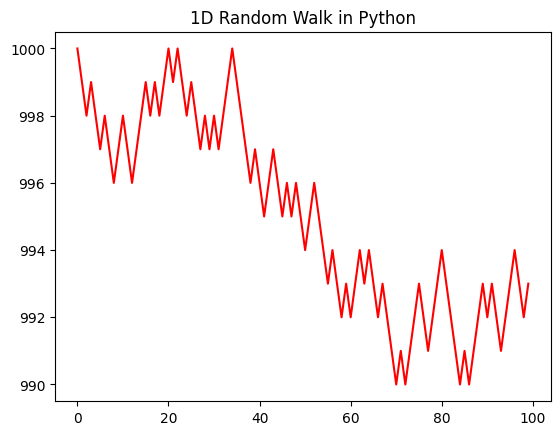

In [2]:
import matplotlib.pyplot as plt

timeline = []
price_history = []

env = CoinEnv()
state = env.reset()
current_time = 0

for _ in range(100):
    timeline.append(current_time)
    price_history.append(state)
    action = env.action_space[np.random.randint(3)]
    state, _, _, _ = env.step(action)
    current_time += 1


plt.plot(timeline, price_history, 'r-')
plt.title("1D Random Walk in Python")
plt.show()